# Causalidade de Granger para Diferentes Variáveis

In [1]:
import pandas as pd
import numpy as np 
import matplotlib 
import seaborn as sns 
import statsmodels.tsa.stattools as st
import matplotlib.pyplot as plt

In [2]:
df_modelagem = pd.read_csv('df_modelagem.csv')
del df_modelagem['Unnamed: 0']

df_modelagem.head()

,IBOV_TWITTER,IBOVESPA_TWITTER,BOVA11_TWITTER,IBOV_GOOGLE,IBOVESPA_GOOGLE,BOVA11_GOOGLE,preco_abertura,preco_fechamento,qtd_negocios,qtd_papeis_negociados,vol_total_negociado
0,0.299603,0.360849,0.600000,0.636364,0.725490,1.000000,0.624014,0.667859,0.102255,0.444254,0.501934
1,0.336310,0.412146,0.763636,0.545455,0.588235,1.000000,0.744163,0.728425,0.379796,0.296519,0.341386
2,0.282738,0.375000,0.200000,0.545455,0.529412,0.666667,0.627725,0.610869,0.536285,0.225746,0.235650
3,0.339286,0.285967,0.327273,0.545455,0.470588,0.666667,0.498106,0.497104,0.423400,0.457473,0.484596
4,0.215278,0.357901,0.127273,0.454545,0.588235,0.666667,0.584970,0.593998,0.314002,0.338085,0.363696


Text(0, 0.5, 'IBOV_GOOGLE')

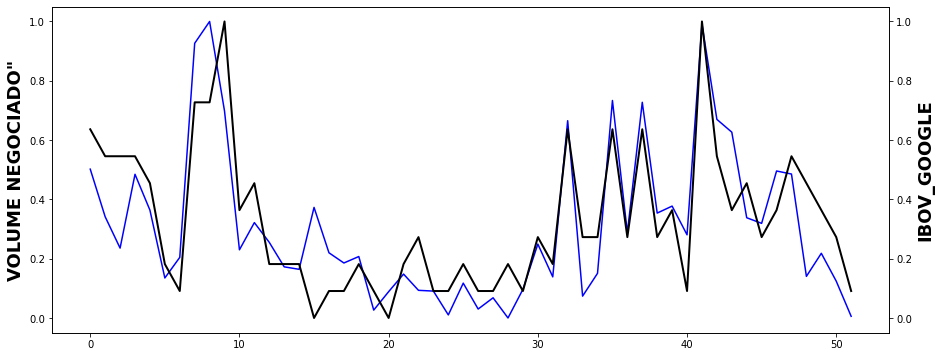

In [3]:
fig = plt.figure(figsize = (15, 6))
ax1 = plt.subplot()

ax1.plot(df_modelagem['vol_total_negociado'].index, df_modelagem['vol_total_negociado'].values, '-b')
ax1.set_ylabel('VOLUME NEGOCIADO"', fontsize = 18, weight = 'bold')
   
ax2 = ax1.twinx()
ax2.plot(df_modelagem['IBOV_GOOGLE'].index, df_modelagem['IBOV_GOOGLE'], color = 'black', linewidth = 2)
ax2.set_ylabel('IBOV_GOOGLE', fontsize = 18, weight = 'bold')

#### teste de causalidade de granger no statsmodel

a hipótese nula é que os coeficientes dos valores correspondentes passados são 0, isto é, a série temporal x2 não "causa" (precede) a série temporal x1.

https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.grangercausalitytests.html

### google x volume

In [4]:
st.grangercausalitytests(df_modelagem[['IBOV_GOOGLE', 'vol_total_negociado']], maxlag = 1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.0689  , p=0.0290  , df_denom=48, df_num=1
ssr based chi2 test:   chi2=5.3857  , p=0.0203  , df=1
likelihood ratio test: chi2=5.1199  , p=0.0237  , df=1
parameter F test:         F=5.0689  , p=0.0290  , df_denom=48, df_num=1


{1: ({'ssr_ftest': (5.068922530169027, 0.02897275049819614, 48.0, 1),
   'ssr_chi2test': (5.385730188304591, 0.020302090095439214, 1),
   'lrtest': (5.1199146289903865, 0.023652780252666178, 1),
   'params_ftest': (5.068922530169023, 0.02897275049819614, 48.0, 1.0)},
   array([[0., 1., 0.]])])}

In [5]:
st.grangercausalitytests(df_modelagem[['IBOVESPA_GOOGLE', 'vol_total_negociado']], maxlag = 1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.9564  , p=0.0069  , df_denom=48, df_num=1
ssr based chi2 test:   chi2=8.4537  , p=0.0036  , df=1
likelihood ratio test: chi2=7.8220  , p=0.0052  , df=1
parameter F test:         F=7.9564  , p=0.0069  , df_denom=48, df_num=1


{1: ({'ssr_ftest': (7.956426061226267, 0.006947214673172181, 48.0, 1),
   'ssr_chi2test': (8.453702690052909, 0.0036430101067226285, 1),
   'lrtest': (7.821985815700543, 0.0051614453020315835, 1),
   'params_ftest': (7.956426061226274, 0.006947214673172155, 48.0, 1.0)},
   array([[0., 1., 0.]])])}

In [6]:
st.grangercausalitytests(df_modelagem[['BOVA11_GOOGLE', 'vol_total_negociado']], maxlag = 1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3808  , p=0.5401  , df_denom=48, df_num=1
ssr based chi2 test:   chi2=0.4046  , p=0.5247  , df=1
likelihood ratio test: chi2=0.4030  , p=0.5256  , df=1
parameter F test:         F=0.3808  , p=0.5401  , df_denom=48, df_num=1


{1: ({'ssr_ftest': (0.38076045940372666, 0.5401126665894451, 48.0, 1),
   'ssr_chi2test': (0.40455798811645954, 0.5247446603966077, 1),
   'lrtest': (0.4029618434589395, 0.5255635882504874, 1),
   'params_ftest': (0.3807604594037308, 0.5401126665894393, 48.0, 1.0)},
   array([[0., 1., 0.]])])}

nos casos dos termos "ibov" e "ibovespa", como o p-valor é menor que .05, é possível rejeitar a hipótese nula do teste e concluir que o volume total negociado é útil para prever o número de citações

In [7]:
st.grangercausalitytests(df_modelagem[['vol_total_negociado', 'IBOV_GOOGLE']], maxlag = 1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3542  , p=0.1315  , df_denom=48, df_num=1
ssr based chi2 test:   chi2=2.5013  , p=0.1137  , df=1
likelihood ratio test: chi2=2.4419  , p=0.1181  , df=1
parameter F test:         F=2.3542  , p=0.1315  , df_denom=48, df_num=1


{1: ({'ssr_ftest': (2.3542041517610546, 0.131511266801955, 48.0, 1),
   'ssr_chi2test': (2.5013419112461204, 0.1137493381860171, 1),
   'lrtest': (2.441936269129968, 0.11813032905406178, 1),
   'params_ftest': (2.3542041517610506, 0.131511266801955, 48.0, 1.0)},
   array([[0., 1., 0.]])])}

In [8]:
st.grangercausalitytests(df_modelagem[['vol_total_negociado', 'IBOVESPA_GOOGLE']], maxlag = 1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4402  , p=0.1248  , df_denom=48, df_num=1
ssr based chi2 test:   chi2=2.5927  , p=0.1074  , df=1
likelihood ratio test: chi2=2.5289  , p=0.1118  , df=1
parameter F test:         F=2.4402  , p=0.1248  , df_denom=48, df_num=1


{1: ({'ssr_ftest': (2.440168338215932, 0.12483323271013179, 48.0, 1),
   'ssr_chi2test': (2.592678859354428, 0.1073586186640347, 1),
   'lrtest': (2.528928716503458, 0.11177607998398469, 1),
   'params_ftest': (2.44016833821594, 0.1248332327101311, 48.0, 1.0)},
   array([[0., 1., 0.]])])}

In [9]:
st.grangercausalitytests(df_modelagem[['vol_total_negociado', 'BOVA11_GOOGLE']], maxlag = 1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0005  , p=0.9819  , df_denom=48, df_num=1
ssr based chi2 test:   chi2=0.0006  , p=0.9812  , df=1
likelihood ratio test: chi2=0.0006  , p=0.9812  , df=1
parameter F test:         F=0.0005  , p=0.9819  , df_denom=48, df_num=1


{1: ({'ssr_ftest': (0.0005210735555447523, 0.9818828745977269, 48.0, 1),
   'ssr_chi2test': (0.0005536406527662993, 0.9812278517583778, 1),
   'lrtest': (0.0005536376476982241, 0.9812279026950728, 1),
   'params_ftest': (0.0005210735555450125, 0.9818828745977269, 48.0, 1.0)},
   array([[0., 1., 0.]])])}

para os três termos, como o p-valor é maior que .05, não é possível rejeitar a hipótese nula do teste, portanto, não é possível concluir que o número de citações é útil para prever o volume total negociado

### twitter x volume

In [10]:
st.grangercausalitytests(df_modelagem[['IBOV_TWITTER', 'vol_total_negociado']], maxlag = 1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1198  , p=0.7308  , df_denom=48, df_num=1
ssr based chi2 test:   chi2=0.1273  , p=0.7213  , df=1
likelihood ratio test: chi2=0.1271  , p=0.7215  , df=1
parameter F test:         F=0.1198  , p=0.7308  , df_denom=48, df_num=1


{1: ({'ssr_ftest': (0.11977336841566547, 0.7307928262620135, 48.0, 1),
   'ssr_chi2test': (0.12725920394164456, 0.7212908896747843, 1),
   'lrtest': (0.1271006939928725, 0.721457284768332, 1),
   'params_ftest': (0.11977336841566608, 0.7307928262620135, 48.0, 1.0)},
   array([[0., 1., 0.]])])}

In [11]:
st.grangercausalitytests(df_modelagem[['IBOVESPA_TWITTER', 'vol_total_negociado']], maxlag = 1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=15.8428 , p=0.0002  , df_denom=48, df_num=1
ssr based chi2 test:   chi2=16.8330 , p=0.0000  , df=1
likelihood ratio test: chi2=14.5463 , p=0.0001  , df=1
parameter F test:         F=15.8428 , p=0.0002  , df_denom=48, df_num=1


{1: ({'ssr_ftest': (15.842778771069373, 0.00023201891023126716, 48.0, 1),
   'ssr_chi2test': (16.83295244426121, 4.0818338601773974e-05, 1),
   'lrtest': (14.546345888508824, 0.00013675361996550117, 1),
   'params_ftest': (15.842778771069367, 0.00023201891023126806, 48.0, 1.0)},
   array([[0., 1., 0.]])])}

In [12]:
st.grangercausalitytests(df_modelagem[['BOVA11_TWITTER', 'vol_total_negociado']], maxlag = 1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1044  , p=0.7480  , df_denom=48, df_num=1
ssr based chi2 test:   chi2=0.1109  , p=0.7391  , df=1
likelihood ratio test: chi2=0.1108  , p=0.7392  , df=1
parameter F test:         F=0.1044  , p=0.7480  , df_denom=48, df_num=1


{1: ({'ssr_ftest': (0.10441091478091183, 0.7480027364135067, 48.0, 1),
   'ssr_chi2test': (0.11093659695471882, 0.7390803427757182, 1),
   'lrtest': (0.11081611547731995, 0.7392169062006595, 1),
   'params_ftest': (0.10441091478091151, 0.7480027364135067, 48.0, 1.0)},
   array([[0., 1., 0.]])])}

no caso do termo "ibovespa", como o p-valor é menor que .05, é possível rejeitar a hipótese nula do teste e concluir que o volume total negociado é útil para prever o número de citações

In [13]:
st.grangercausalitytests(df_modelagem[['vol_total_negociado', 'IBOV_TWITTER']], maxlag = 1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3011  , p=0.1358  , df_denom=48, df_num=1
ssr based chi2 test:   chi2=2.4450  , p=0.1179  , df=1
likelihood ratio test: chi2=2.3882  , p=0.1223  , df=1
parameter F test:         F=2.3011  , p=0.1358  , df_denom=48, df_num=1


{1: ({'ssr_ftest': (2.3011324367102106, 0.13583864266995385, 48.0, 1),
   'ssr_chi2test': (2.4449532140045984, 0.11790340058082137, 1),
   'lrtest': (2.38815555942989, 0.1222577997009616, 1),
   'params_ftest': (2.301132436710213, 0.13583864266995385, 48.0, 1.0)},
   array([[0., 1., 0.]])])}

In [14]:
st.grangercausalitytests(df_modelagem[['vol_total_negociado', 'IBOVESPA_TWITTER']], maxlag = 1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6354  , p=0.4293  , df_denom=48, df_num=1
ssr based chi2 test:   chi2=0.6751  , p=0.4113  , df=1
likelihood ratio test: chi2=0.6707  , p=0.4128  , df=1
parameter F test:         F=0.6354  , p=0.4293  , df_denom=48, df_num=1


{1: ({'ssr_ftest': (0.6354115997506471, 0.42930275464834144, 48.0, 1),
   'ssr_chi2test': (0.6751248247350625, 0.4112705452911447, 1),
   'lrtest': (0.6706953090933041, 0.412809295655976, 1),
   'params_ftest': (0.63541159975065, 0.42930275464834144, 48.0, 1.0)},
   array([[0., 1., 0.]])])}

In [15]:
st.grangercausalitytests(df_modelagem[['vol_total_negociado', 'BOVA11_TWITTER']], maxlag = 1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3188  , p=0.5749  , df_denom=48, df_num=1
ssr based chi2 test:   chi2=0.3388  , p=0.5605  , df=1
likelihood ratio test: chi2=0.3376  , p=0.5612  , df=1
parameter F test:         F=0.3188  , p=0.5749  , df_denom=48, df_num=1


{1: ({'ssr_ftest': (0.31882871589041345, 0.5749418126248365, 48.0, 1),
   'ssr_chi2test': (0.3387555106335643, 0.5605484470531854, 1),
   'lrtest': (0.3376354159534287, 0.5611972949302153, 1),
   'params_ftest': (0.3188287158904176, 0.57494181262483, 48.0, 1.0)},
   array([[0., 1., 0.]])])}

para os três termos, como o p-valor é maior que .05, não é possível rejeitar a hipótese nula do teste, portanto, não é possível concluir que o número de citações é útil para prever o volume total negociado

### teste regressão

<AxesSubplot:xlabel='vol_total_negociado', ylabel='IBOV_GOOGLE'>

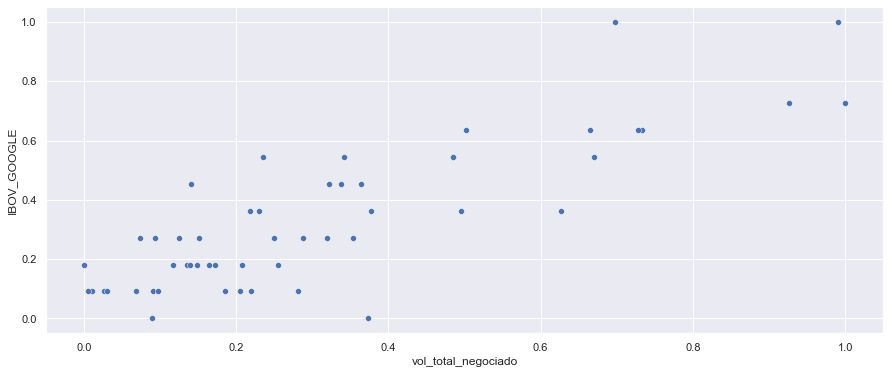

In [16]:
sns.set(rc={'figure.figsize':(15, 6)})

sns.scatterplot(x = df_modelagem['vol_total_negociado'], y = df_modelagem['IBOV_GOOGLE'])

In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [18]:
reg_model = ols('vol_total_negociado ~ IBOV_GOOGLE', data = df_modelagem).fit()
print(reg_model.summary())

                             OLS Regression Results                            
Dep. Variable:     vol_total_negociado   R-squared:                       0.697
Model:                             OLS   Adj. R-squared:                  0.691
Method:                  Least Squares   F-statistic:                     115.2
Date:                 Thu, 15 Dec 2022   Prob (F-statistic):           1.40e-14
Time:                         22:38:12   Log-Likelihood:                 28.251
No. Observations:                   52   AIC:                            -52.50
Df Residuals:                       50   BIC:                            -48.60
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0168      0.034      0

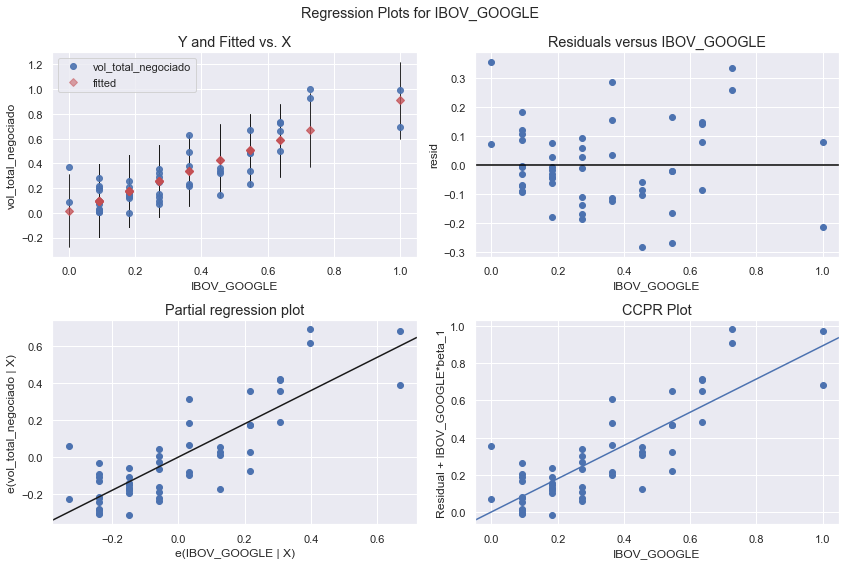

In [19]:
fig = plt.figure(figsize = (12, 8))
fig = sm.graphics.plot_regress_exog(reg_model, 'IBOV_GOOGLE', fig = fig)

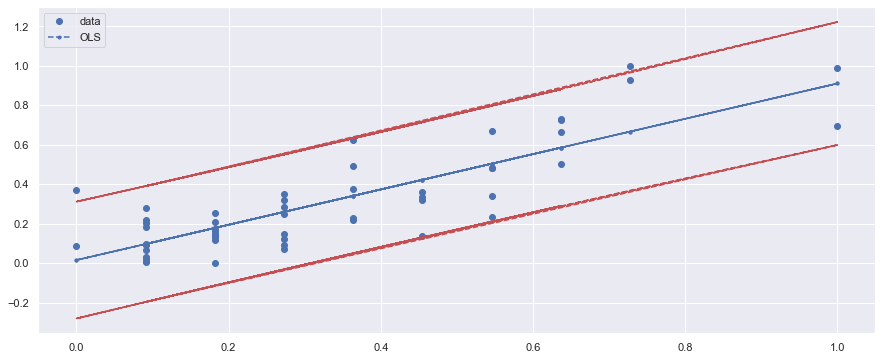

In [20]:
pred_ols = reg_model.get_prediction()

iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize = (15, 6))

ax.plot(df_modelagem['IBOV_GOOGLE'], df_modelagem['vol_total_negociado'], "o", label="data")
ax.plot(df_modelagem['IBOV_GOOGLE'], reg_model.fittedvalues, "b--.", label="OLS")
ax.plot(df_modelagem['IBOV_GOOGLE'], iv_u, "r--")
ax.plot(df_modelagem['IBOV_GOOGLE'], iv_l, "r--")
ax.legend(loc = "best")